In [12]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
df=pd.read_csv('earthquake_data_tsunami.csv')
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [14]:
#cmi-cumulative merged intensity
df['cmi']=0.7*df['mmi']+0.3*df['cdi']
df.to_csv('earthquake_data_tsunami_new.csv',index=False)
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,cmi
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1,7.3
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0,4.0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1,3.0
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1,5.0
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1,1.4


<Axes: xlabel='tsunami', ylabel='cmi'>

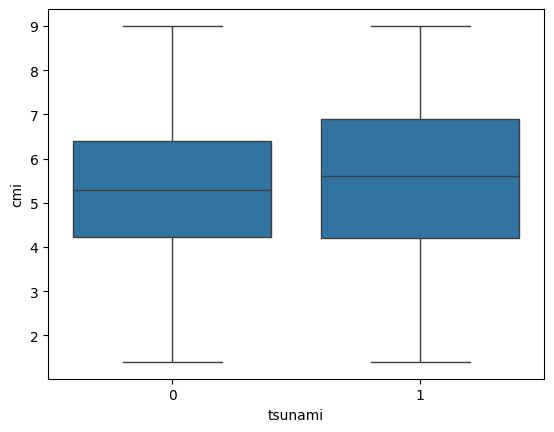

In [11]:


sns.boxplot(x='tsunami', y='cmi', data=df)


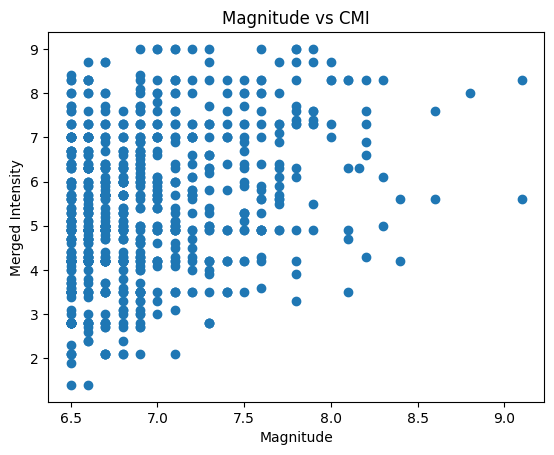

In [17]:
plt.scatter(df['magnitude'], df['cmi'])
plt.xlabel('Magnitude')
plt.ylabel('Merged Intensity')
plt.title('Magnitude vs CMI')
plt.show()

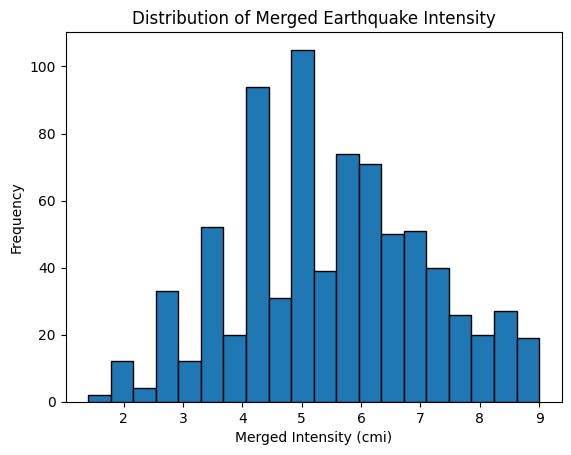

In [ ]:

plt.hist(df['cmi'], bins=20, edgecolor='black')
plt.xlabel('Merged Intensity (cmi)')
plt.ylabel('Frequency')
plt.title('Distribution of Merged Earthquake Intensity')
plt.show()


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


df = pd.read_csv("earthquake_data_tsunami_new.csv")


features = ['cmi', 'magnitude', 'depth']

if 'latitude' in df.columns and 'longitude' in df.columns:
    features += ['latitude', 'longitude']

X = df[features]
y = df['tsunami']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier(random_state=42))
])


param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)


print("\nBest Parameters Found:", grid.best_params_)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nFinal Model Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits

✅ Best Parameters Found: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 100}

📈 Final Model Performance:
Accuracy: 0.713
ROC-AUC: 0.788

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        96
           1       0.64      0.59      0.62        61

    accuracy                           0.71       157
   macro avg       0.70      0.69      0.69       157
weighted avg       0.71      0.71      0.71       157

